<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 03 de Data Science

# Regressão Linear
Tempo estimado: **60** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Criar um modelo de regressão linear simples
* Criar um modelo de regressão linear múltipla
* Fazer a previsão dos seus dados
* Calcular o erro R^2
* Calcular o Mean square

## Obtendo os dados

In [602]:
import pandas as pd  
import numpy as np   
import math 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pearsonr # correlações de Pearson
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm # modelagem estatística
%matplotlib inline 

In [603]:
caminho = "" # o objeto ainda está vazio. 

caminho = "https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/dev/Data/MeuAutoLimpo.csv" 

df = pd.read_csv(caminho) 

In [604]:
# Exibindo as cinco primeiras linhas do dataframe
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [605]:
# Tabela para guardar os valores dos scores de cada modelo
table = pd.DataFrame(columns = ["Modelo", "Score"])
table.head()

,Modelo,Score


In [606]:
# obtendo informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

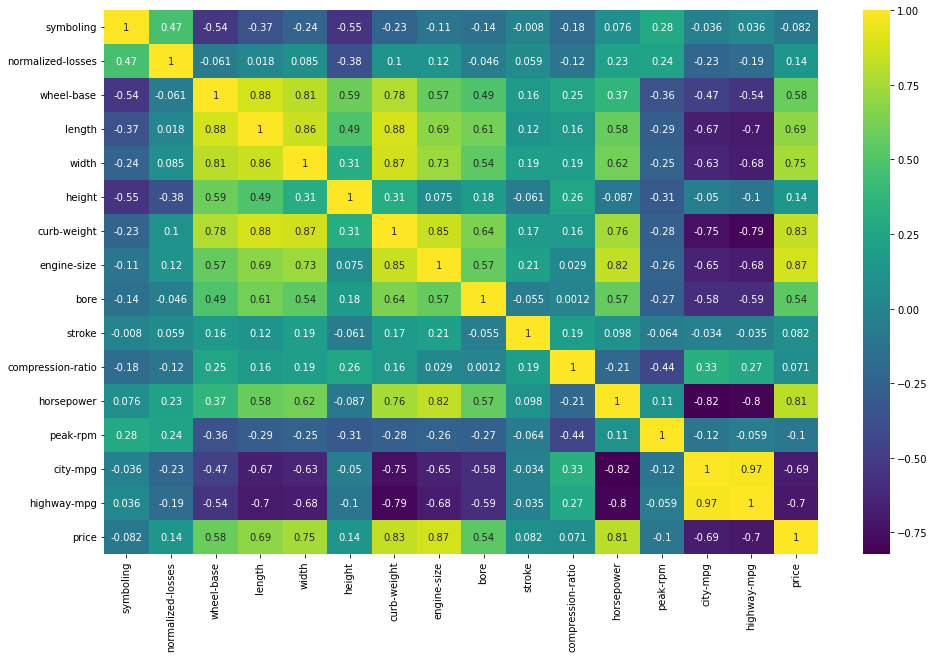

In [607]:
#Avaliando as correlações (Usado paleta viridis para melhor apresentação aos daltonicos)
fig = plt.figure(figsize=(16,10))
ax1 = fig.subplots()
sns.heatmap(df.corr(),ax = ax1,annot=True,cmap = plt.cm.viridis)
plt.show()

<Figure size 1080x720 with 0 Axes>

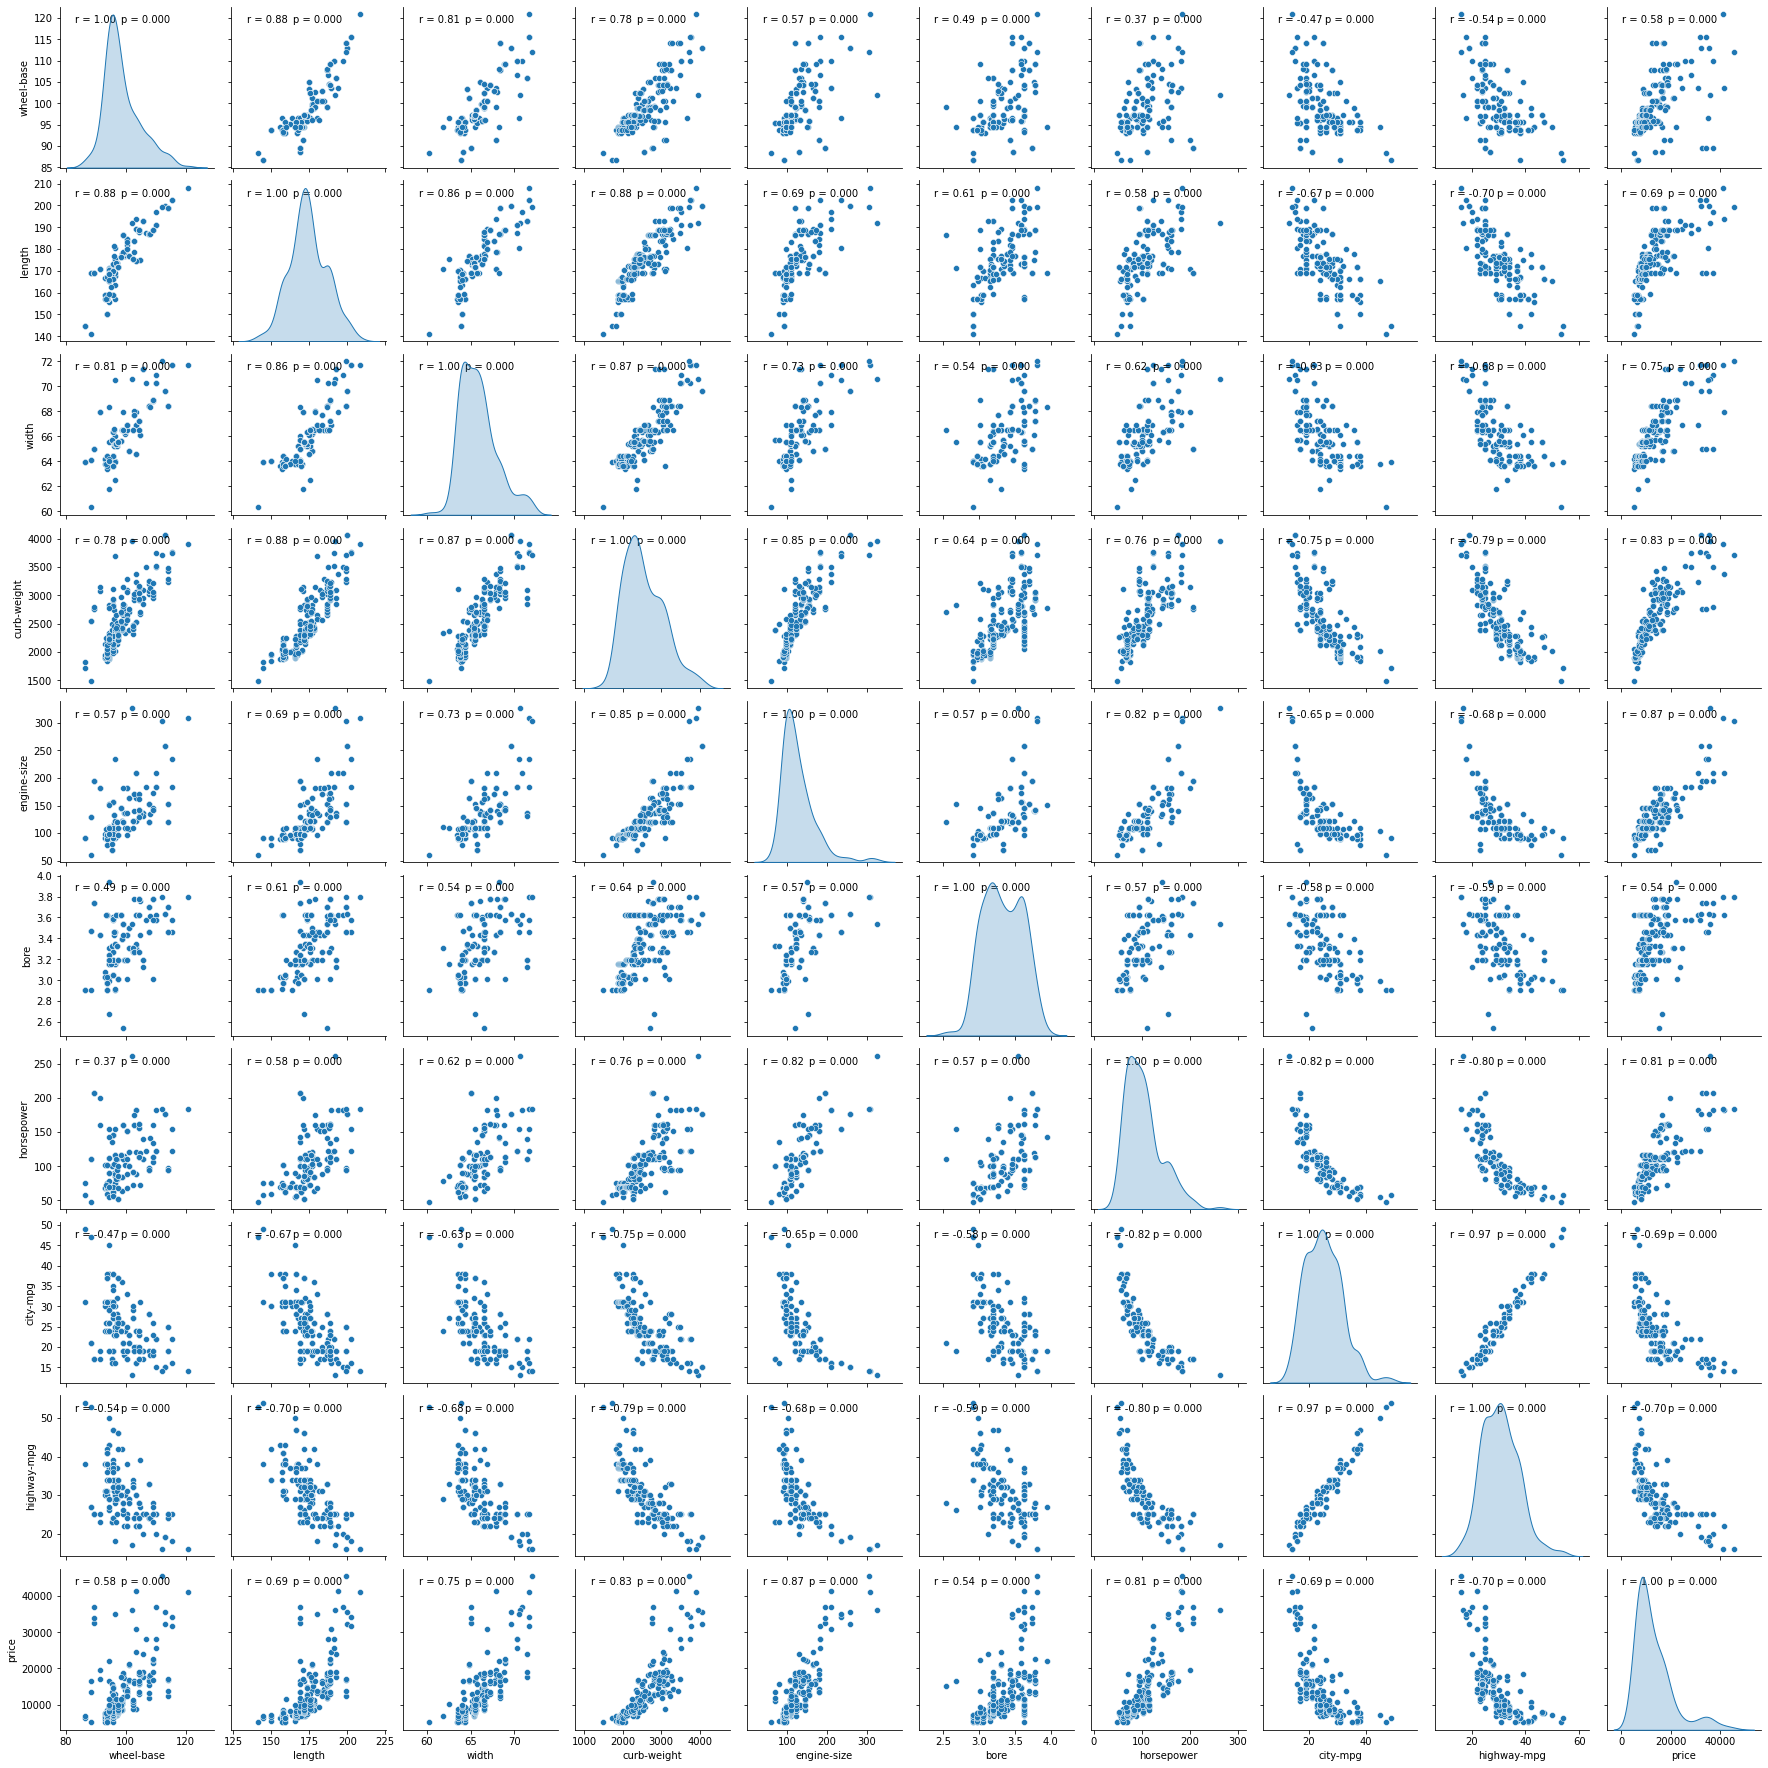

In [608]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

# Recriando dataframe com as melhores correlações e plotando os valores das correlações e as significâncias

df.drop(columns=['symboling','normalized-losses','height','stroke','compression-ratio','peak-rpm'] , axis="column" , inplace=True)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df, diag_kind="kde")
graph.map(corrfunc)
plt.show()


## Modelo 1 - Regressão Linear Simples

### Revisando

$$
    X : Variável \ independente \\
    Y : Variável \ dependente
$$

**Função Linear**
$$
    Yhat = \alpha + \beta  X
$$

* a : se refere ao intercepto da regressão linear, ou seja, o valor de Y quando X é 0.
* b : se refere a inclinação da reta, ou seja, o valor com o qual Y muda quando X aumenta em uma unidade.

### Implementação

* Como poderia `highway-mpg` nos ajudar a prever o preço do carro?
* Para este exemplo, queremos ver como a `highway-mpg` pode nos ajudar a prever o preço do carro.
* Usando a regressão linear simples, criaremos uma função linear com `highway-mpg` como a variável preditor e o `price` como a variável de resposta.

In [609]:
# Criando um objeto para regressão
lm = LinearRegression()
lm

LinearRegression()

In [610]:
# Verificando a estatística descritiva
df_linear = df[['price','highway-mpg']].copy(deep=True)

# renomeando porque o modelo não gosta de traços
df_linear = df_linear.rename(columns={'highway-mpg': 'highway_mpg'})
df_linear.describe()

,price,highway_mpg
count,201.000000,201.000000
mean,13207.129353,30.686567
std,7947.066342,6.815150
min,5118.000000,16.000000
25%,7775.000000,25.000000
50%,10295.000000,30.000000
75%,16500.000000,34.000000
max,45400.000000,54.000000


Text(0, 0.5, 'price')

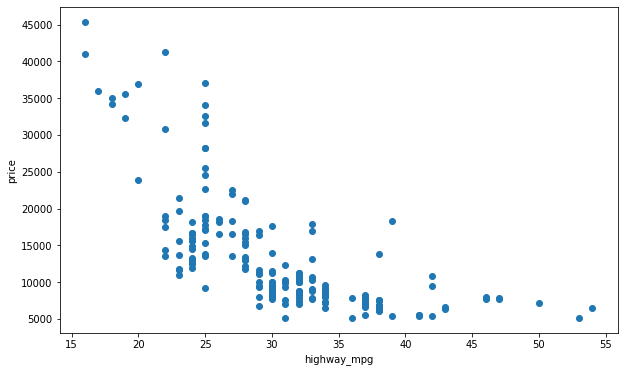

In [611]:
X = df_linear[['highway_mpg']] # Aqui o SciKit Learn precisa da amostras e da dimensão, 
                        # por isso precisamos passar uma matriz ou dataFrame
Y = df_linear['price']

plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.xlabel(xlabel='highway_mpg')
plt.ylabel(ylabel='price')

* Aplica o modelo Linear usando somente `highway-mpg` como variável Independente


In [612]:
# Criando a regressão
lm.fit(X,Y)

LinearRegression()

* Calcular os valores previstos:


In [613]:
# Valores da predição
Yhat = lm.predict(X)
df_linear.loc[:,'Yhat'] = Yhat
df_linear.head(20)


,price,highway_mpg,Yhat
0,13495.0,27,16236.504643
1,16500.0,27,16236.504643
2,16500.0,26,17058.238022
3,13950.0,30,13771.304508
4,17450.0,22,20345.171535
5,15250.0,25,17879.971400
6,17710.0,25,17879.971400
7,18920.0,25,17879.971400
8,23875.0,20,21988.638292
9,16430.0,29,14593.037887


* Qual o valor do intercepto (a)?


In [614]:
alpha = lm.intercept_
print('O valor do alpha é:',alpha)

O valor do alpha é: 38423.3058581574


* Qual o valor da inclinação da reta (b)?


In [615]:
beta = lm.coef_
print('O valor do beta é:', beta)

O valor do beta é: [-821.73337832]


* E agora se calcularmos os valores da predição através da formula?

In [616]:
df_linear.loc[:,'YhatCalc'] = alpha+beta*df_linear['highway_mpg']
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc
0,13495.0,27,16236.504643,16236.504643
1,16500.0,27,16236.504643,16236.504643
2,16500.0,26,17058.238022,17058.238022
3,13950.0,30,13771.304508,13771.304508
4,17450.0,22,20345.171535,20345.171535
5,15250.0,25,17879.971400,17879.971400
6,17710.0,25,17879.971400,17879.971400
7,18920.0,25,17879.971400,17879.971400
8,23875.0,20,21988.638292,21988.638292
9,16430.0,29,14593.037887,14593.037887


**Qual o erro da precisão (R2)?**

* R2 = 1
    * Todos os pontos observados estão sobre a reta estimada. 
    * Neste caso, as variações de Y são 100% explicadas pelas variações de X, através da função especificada, não havendo desvios em torno da reta estimada.
* R2 = 0
    * As variáveis de Y são puramente aleatórias e a inclusão da variável X no modelo não trará informação alguma sobre as variações de Y.


In [617]:
R2=lm.score(X, Y)
print("SCORE: ",R2)

SCORE:  0.4965911884339176


### Analisando a Predição

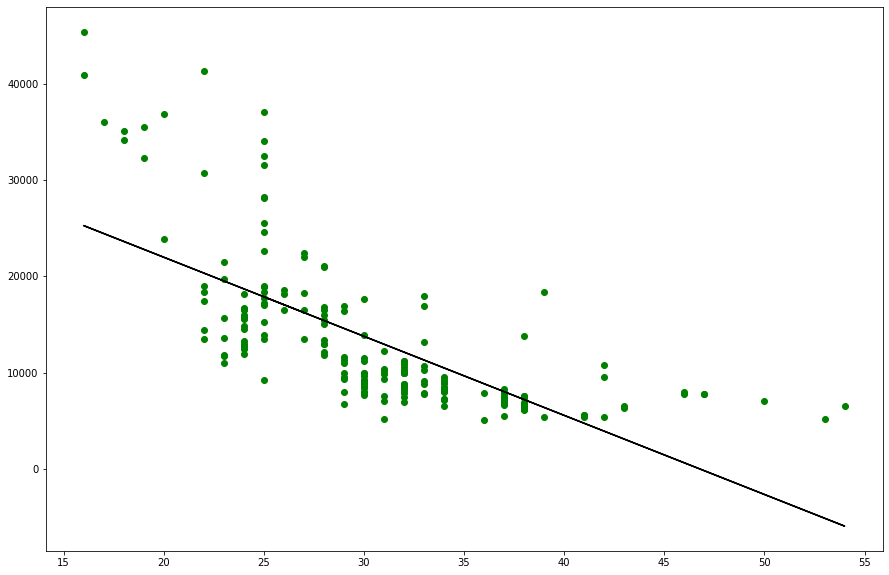

In [618]:
plt.figure(figsize=(15, 10))
plt.scatter(X, Y,color='g')
plt.plot(X, Yhat,color='k')
plt.show()

### Comparando Previsto x Real

* Analisando a descritiva

In [619]:
df_linear.describe()

,price,highway_mpg,Yhat,YhatCalc
count,201.000000,201.000000,201.000000,201.000000
mean,13207.129353,30.686567,13207.129353,13207.129353
std,7947.066342,6.815150,5600.236181,5600.236181
min,5118.000000,16.000000,-5950.296571,-5950.296571
25%,7775.000000,25.000000,10484.370995,10484.370995
50%,10295.000000,30.000000,13771.304508,13771.304508
75%,16500.000000,34.000000,17879.971400,17879.971400
max,45400.000000,54.000000,25275.571805,25275.571805


* Vamos usar o recurso gráfico para comparar o preço previsto vs o real.

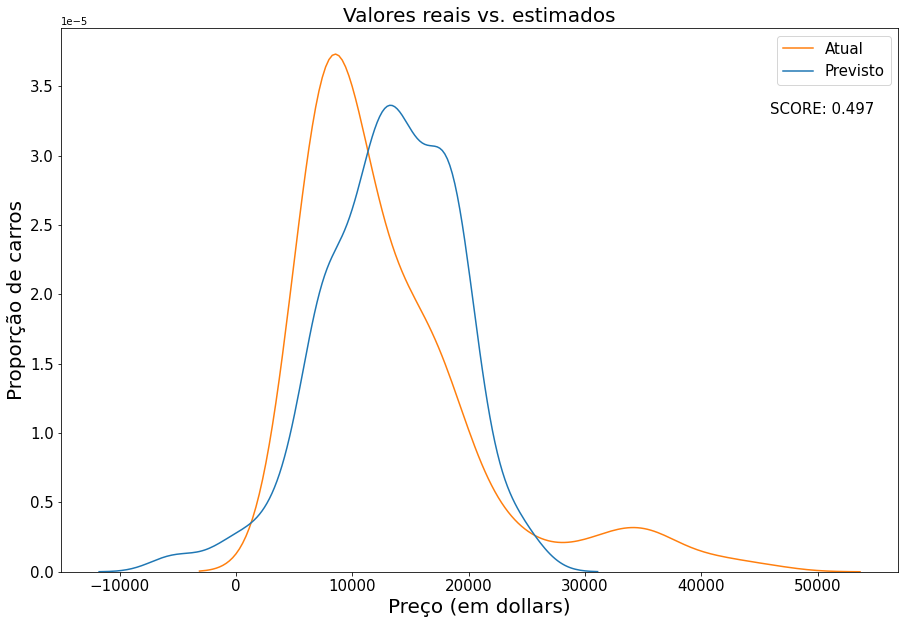

In [620]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_linear[['Yhat','price']]) # KDE - kernel density estimate

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %.3f" % R2

plt.text(45900, 0.000033, tt, size = 15)

plt.show()
plt.close()

# incluir linha na Tabela final para compararmos os diversos modelos
table.loc[table.shape[0]] = ["Modelo 1", lm.score(X, Y)]

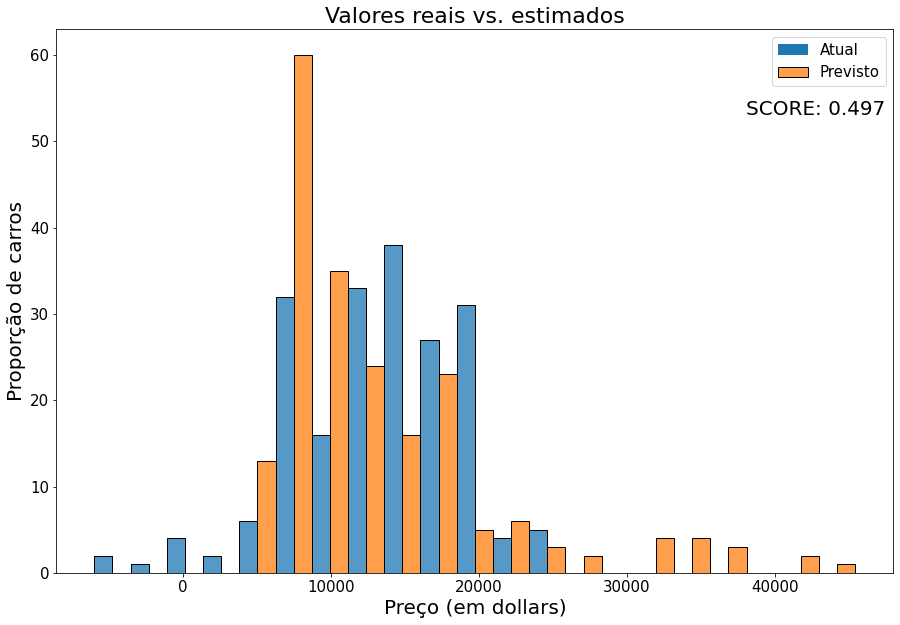

In [621]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.histplot(data = df_linear[['Yhat','price']], multiple = 'dodge')

plt.title('Valores reais vs. estimados', size = 22)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %.3f" % lm.score(X, Y)

plt.text(38000, 53, tt, size = 20)

plt.show()
plt.close()

### Cálculo dos erros:

* Absoluto médio
* Raiz do erro quadrático médio

In [622]:
df_linear.loc[:,'Deviation'] = df_linear['Yhat']-df_linear['price']
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation
0,13495.0,27,16236.504643,16236.504643,2741.504643
1,16500.0,27,16236.504643,16236.504643,-263.495357
2,16500.0,26,17058.238022,17058.238022,558.238022
3,13950.0,30,13771.304508,13771.304508,-178.695492
4,17450.0,22,20345.171535,20345.171535,2895.171535
5,15250.0,25,17879.971400,17879.971400,2629.971400
6,17710.0,25,17879.971400,17879.971400,169.971400
7,18920.0,25,17879.971400,17879.971400,-1040.028600
8,23875.0,20,21988.638292,21988.638292,-1886.361708
9,16430.0,29,14593.037887,14593.037887,-1836.962113


In [623]:
#Criando uma nova coluna com o erro absoluto
df_linear.loc[:,'AbsDeviation'] = abs(df_linear['Yhat']-df_linear['price'])
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation,AbsDeviation
0,13495.0,27,16236.504643,16236.504643,2741.504643,2741.504643
1,16500.0,27,16236.504643,16236.504643,-263.495357,263.495357
2,16500.0,26,17058.238022,17058.238022,558.238022,558.238022
3,13950.0,30,13771.304508,13771.304508,-178.695492,178.695492
4,17450.0,22,20345.171535,20345.171535,2895.171535,2895.171535
5,15250.0,25,17879.971400,17879.971400,2629.971400,2629.971400
6,17710.0,25,17879.971400,17879.971400,169.971400,169.971400
7,18920.0,25,17879.971400,17879.971400,-1040.028600,1040.028600
8,23875.0,20,21988.638292,21988.638292,-1886.361708,1886.361708
9,16430.0,29,14593.037887,14593.037887,-1836.962113,1836.962113


In [624]:
# Quadrado do absoluto
df_linear.loc[:,'SquaredError'] = (df_linear['price']-df_linear['Yhat'])**2
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation,AbsDeviation,SquaredError
0,13495.0,27,16236.504643,16236.504643,2741.504643,2741.504643,7.515848e+06
1,16500.0,27,16236.504643,16236.504643,-263.495357,263.495357,6.942980e+04
2,16500.0,26,17058.238022,17058.238022,558.238022,558.238022,3.116297e+05
3,13950.0,30,13771.304508,13771.304508,-178.695492,178.695492,3.193208e+04
4,17450.0,22,20345.171535,20345.171535,2895.171535,2895.171535,8.382018e+06
5,15250.0,25,17879.971400,17879.971400,2629.971400,2629.971400,6.916750e+06
6,17710.0,25,17879.971400,17879.971400,169.971400,169.971400,2.889028e+04
7,18920.0,25,17879.971400,17879.971400,-1040.028600,1040.028600,1.081659e+06
8,23875.0,20,21988.638292,21988.638292,-1886.361708,1886.361708,3.558360e+06
9,16430.0,29,14593.037887,14593.037887,-1836.962113,1836.962113,3.374430e+06


* Calculando os erros

In [625]:
#Mean Absolute Desviation - Erro absoluto médio
MAD = df_linear['AbsDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_linear['SquaredError'].mean()

#Mean Squared Root Error = Raiz do erro quadrado médio
MSRE = math.sqrt(MSE)

print('MAD:',MAD,'MSE:',MSE,'MSRE:',MSRE)

MAD: 4054.9931281284407 MSE: 31635042.944639888 MSRE: 5624.503795415191


Text(0.5, 0, 'Resíduo (em dollars)')

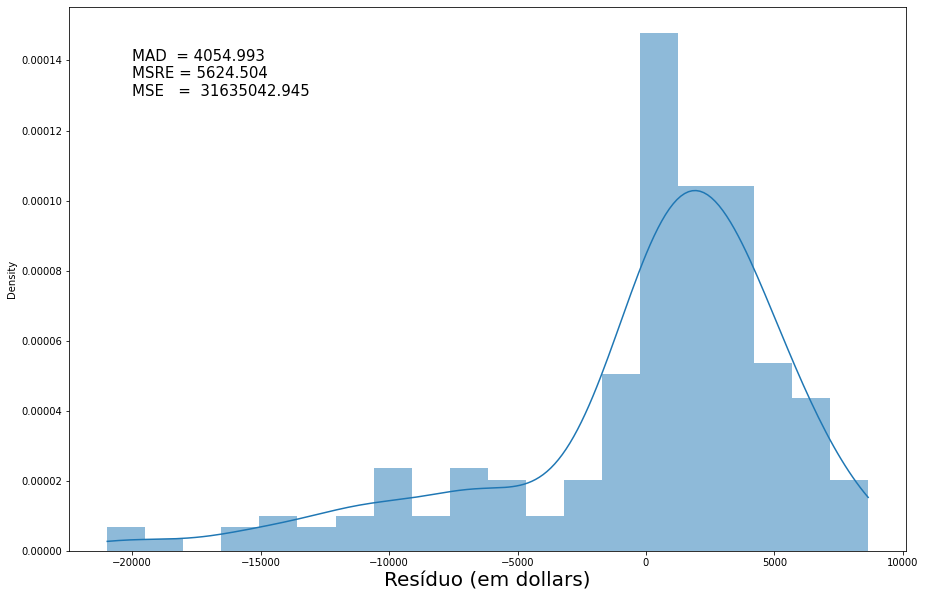

In [626]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, MSE)

sns.histplot(x=df_linear['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-20000, 0.00013, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

### Teste de Shapiro-Francia para verificar se os erros tem aderência a normalidade
* Se o p-valor for menor do que 0.05 então a distribuição não está aderente a normalidade
* Se o p-valor for maior do que 0.05 então a distribuição ESTÁ aderente a normalidade.

In [627]:
# importar a biblioteca Shapiro-Francia para verificar se os erros tem aderência a normalidade
# ! pip install statstests
# ! pip install statsmodels

In [628]:
import statsmodels.api as sm # biblioteca de modelagem estatística
from statstests.tests import shapiro_francia

In [629]:
shapiro_test = shapiro_francia(df_linear['Deviation'])
#shapiro_test
print("Se o valor for menor que 0.05 será rejeitado, Valor: {:.6f}".format(shapiro_test['p-value']))

method  :  Shapiro-Francia normality test
statistics W  :  0.860063092252251
statistics z  :  6.474537034736263
p-value  :  4.755154192203291e-11
Se o valor for menor que 0.05 será rejeitado, Valor: 0.000000


### Análise dos parâmetros (Teste F)

* Em geral, um valor p menor que 0,05 (ou 5%) é considerado significativo, o que significa que há evidências suficientes para rejeitar a hipótese nula e concluir que as variáveis independentes são importantes para explicar a variável dependente. Se o valor p for maior que 0,05, não há evidências suficientes para rejeitar a hipótese nula e concluímos que as variáveis independentes não são importantes para explicar a variável dependente.

* **Cálculo direto do teste F**

In [630]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
from sklearn.feature_selection import f_regression
f , p= f_regression(df_linear[['highway_mpg']], df_linear['price'],  center=True, force_finite=True)
print('Estatistica F = %.3f' % f)
print('P-valor = %.3f' % p)

Estatistica F = 196.305
P-valor = 0.000


### Análise dos parâmetros (Anova)

In [631]:
# Realizando a Análise da Variância

# Ajustando o modelo de regressão linear
modelAnova = sm.OLS.from_formula('price ~ highway_mpg', df_linear).fit()

# Calculando a ANOVA
# O typ = 2 , considera a contribuição de cada variável explicativa (ou preditora)
# individualmente para explicar a variância da variável resposta,
# controlando pelo efeito de outras variáveis explicativas no modelo.
anova_table = sm.stats.anova_lm(modelAnova, typ=2)

# Imprimindo a tabela ANOVA
anova_table

,sum_sq,df,F,PR(>F)
highway_mpg,6.272529e+09,1.0,196.30496,1.749547e-31
Residual,6.358644e+09,199.0,NaN,NaN


* **Summary Table**
* A tabela gerada contém informações como o coeficiente de determinação (R-quadrado), os coeficientes estimados para as variáveis explicativas, seus erros padrão, t-valor, p-valor, e intervalo de confiança de 95%. Além disso, a tabela também contém informações sobre a qualidade geral do modelo, como a estatística F, o p-valor associado, e o número de observações e graus de liberdade.

In [632]:
summary_table = modelAnova.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     196.3
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.75e-31
Time:                        01:03:08   Log-Likelihood:                -2020.8
No. Observations:                 201   AIC:                             4046.
Df Residuals:                     199   BIC:                             4052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.842e+04   1843.391     20.844      0.000    3.48e+04    4.21e+04
highway_mpg  -821.7334     58.650    -14.011      0.000    -937.388    -706.079
==============================================================================
Omnibus:                       58.855   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.474
Skew:                           1.476   Prob(JB):                     1.69e-24
Kurtosis:                       5.088   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelo 2 - Regressão Linear Múltipla

<p>Da seção anterior sabemos que outros bons preditores de preço poderiam ser:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Vamos desenvolver um modelo utilizando estas variáveis como variáveis preditoras.

In [633]:
# Ajustando o novo dataframe

df_linear_multipla = df[['price','horsepower', 'curb-weight', 'engine-size', 'highway-mpg']].copy(deep=True)
df_linear_multipla = df_linear_multipla.rename(columns={'highway-mpg': 'highway_mpg','engine-size':'engine_size','curb-weight':'curb_weight'})

# Criando as novas variáveis
X = df_linear_multipla[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]
Y = df_linear_multipla['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
print("SCORE: ",lm.score(X,Y))


SCORE:  0.8094130135602673


In [634]:
df_linear_multipla = df[['price','horsepower', 'curb-weight', 'engine-size', 'highway-mpg']].copy(deep=True)
df_linear_multipla = df_linear_multipla.rename(columns={'highway-mpg': 'highway_mpg','engine-size':'engine_size','curb-weight':'curb_weight'})

# Criando as novas variáveis
X = df_linear_multipla[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]
Y = df_linear_multipla['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)


SCORE: 0.8094


* Calcular os valores previstos:


In [635]:
#Fazendo a predição dos dados

YHatLinMult = lm.predict(X)

In [636]:
# Carregando os valores previstos para o dataframe

df_linear_multipla.loc[:,'YHat'] = YHatLinMult

In [637]:
df_linear_multipla.head(5)

,price,horsepower,curb_weight,engine_size,highway_mpg,YHat
0,13495.0,111.0,2548,130,27,13699.001388
1,16500.0,111.0,2548,130,27,13699.001388
2,16500.0,154.0,2823,152,26,19055.180751
3,13950.0,102.0,2337,109,30,10621.208891
4,17450.0,115.0,2824,136,22,15519.941331


In [638]:
# Analisando a estatística descritiva
df_linear_multipla[['price','YHat']].describe()

,price,YHat
count,201.000000,201.000000
mean,13207.129353,13207.129353
std,7947.066342,7149.767671
min,5118.000000,654.868289
25%,7775.000000,7361.431299
50%,10295.000000,11179.012612
75%,16500.000000,17390.483881
max,45400.000000,44000.602377


### Comparando Previsto x Real

Vamos usar o recurso gráfico para visualizar esse erro.

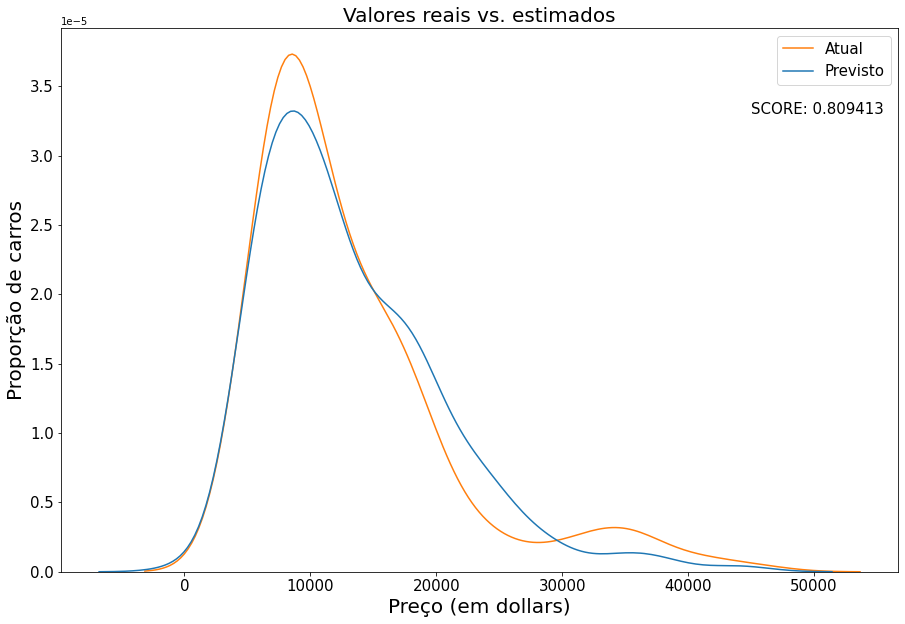

In [639]:
# Vamos colocar tudo num mesmo Data Frame para facilitar o Plot
%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_linear_multipla[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

plt.show()
plt.close()

# incluir linha na Tabela final para compararmos os diversos modelos
table.loc[table.shape[0]] = "Modelo 2",R2

### Cálculo dos erros

Text(0.5, 0, 'Resíduo (em dollars)')

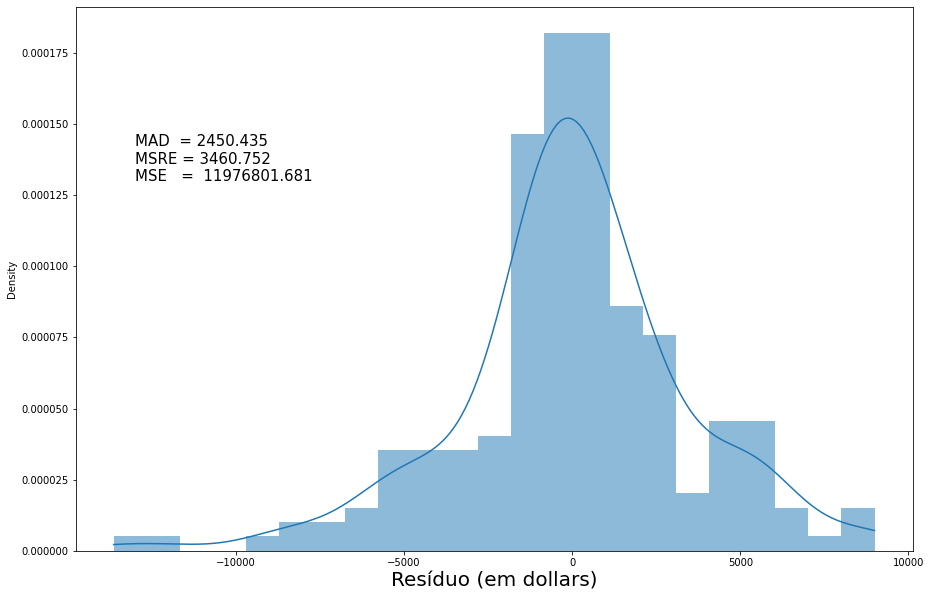

In [640]:
# Erro
df_linear_multipla.loc[:,'Deviation'] = df_linear_multipla['YHat']-df_linear_multipla['price']

# Erro absoluto
df_linear_multipla.loc[:,'AbsDeviation'] = abs(df_linear_multipla['YHat']-df_linear_multipla['price'])

# Quadrado do erro absolulto
df_linear_multipla.loc[:,'SquaredError'] = (df_linear_multipla['price']-df_linear_multipla['YHat'])**2

#Mean Absolute Desviation - Erro absoluto médio
MAD = df_linear_multipla['AbsDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_linear_multipla['SquaredError'].mean()

#Mean Squared Root Error = Raiz do erro quadrado médio
MSRE = math.sqrt(MSE)

%matplotlib inline 
plt.figure(figsize=(15, 10))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, MSE)

sns.histplot(x=df_linear_multipla['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-13000, 0.00013, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

In [641]:
# Verificando se melhorou a aderência dos resíduos a normalidade

shapiro_test = shapiro_francia(df_linear_multipla['Deviation'])

print("Se o valor for menor que 0.05 será rejeitado, Valor: {:.6f}".format(shapiro_test['p-value']))

method  :  Shapiro-Francia normality test
statistics W  :  0.9590052916523912
statistics z  :  3.935125065344504
p-value  :  4.157669181064774e-05
Se o valor for menor que 0.05 será rejeitado, Valor: 0.000042


In [642]:
# Realizando a Análise da Variância

# Ajustando o modelo de regressão linear
modelAnova = sm.OLS.from_formula('price ~ horsepower + curb_weight + engine_size + highway_mpg', df_linear_multipla).fit()

# Calculando a ANOVA
# O typ = 2 , considera a contribuição de cada variável explicativa (ou preditora)
# individualmente para explicar a variância da variável resposta,
# controlando pelo efeito de outras variáveis explicativas no modelo.
anova_table = sm.stats.anova_lm(modelAnova, typ=2)

# Imprimindo a tabela ANOVA
anova_table

,sum_sq,df,F,PR(>F)
horsepower,1.628237e+08,1.0,13.256744,3.475167e-04
curb_weight,2.175569e+08,1.0,17.712997,3.909364e-05
engine_size,4.124117e+08,1.0,33.577636,2.695951e-08
highway_mpg,2.958911e+06,1.0,0.240908,6.241002e-01
Residual,2.407337e+09,196.0,NaN,NaN


In [643]:
summary_table = modelAnova.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     208.1
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           2.26e-69
Time:                        01:03:13   Log-Likelihood:                -1923.2
No. Observations:                 201   AIC:                             3856.
Df Residuals:                     196   BIC:                             3873.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.582e+04   4388.105     -3.606      0.000   -2.45e+04   -7170.075
horsepower     53.6104     14.724      3.641      0.000      24.572      82.649
curb_weight     4.7089      1.119      4.209      0.000       2.502       6.915
engine_size    81.4723     14.060      5.795      0.000      53.744     109.201
highway_mpg    36.3964     74.154      0.491      0.624    -109.845     182.638
==============================================================================
Omnibus:                       16.086   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.726
Skew:                           0.401   Prob(JB):                     3.51e-07
Kurtosis:                       4.705   Cond. No.                     4.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Tudo indica que Highway não está contribuindo para a explicação do modelo. 

Text(0.5, 0, 'Resíduo (em dollars)')

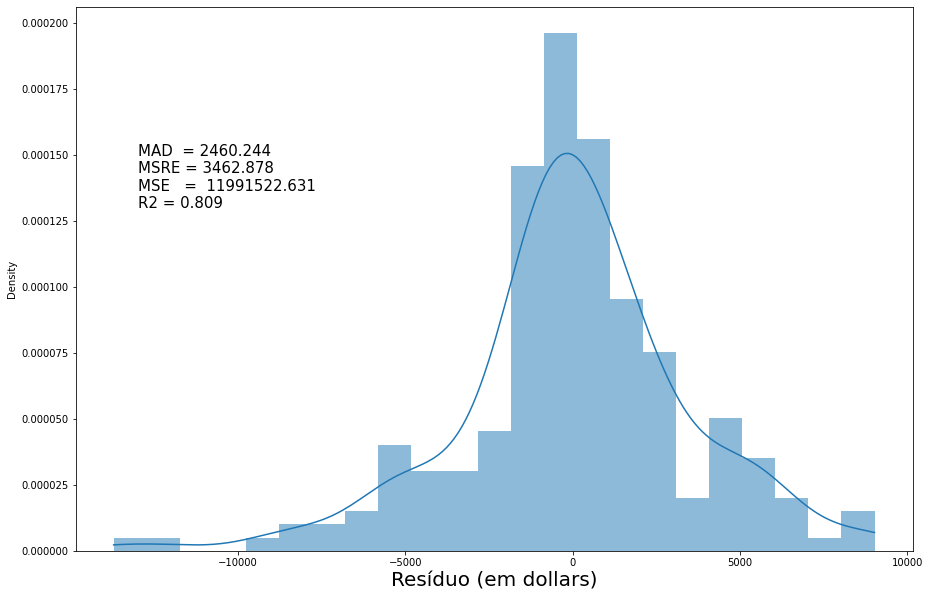

In [644]:
df_linear_multipla = df[['price','horsepower', 'curb-weight', 'engine-size']].copy(deep=True)
df_linear_multipla = df_linear_multipla.rename(columns={'engine-size':'engine_size','curb-weight':'curb_weight'})

# Criando as novas variáveis
X = df_linear_multipla[['horsepower', 'curb_weight', 'engine_size']]
Y = df_linear_multipla['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

YHatLinMult = lm.predict(X)

df_linear_multipla.loc[:,'YHat'] = YHatLinMult
# Erro
df_linear_multipla.loc[:,'Deviation'] = df_linear_multipla['YHat']-df_linear_multipla['price']

# Erro absoluto
df_linear_multipla.loc[:,'AbsDeviation'] = abs(df_linear_multipla['YHat']-df_linear_multipla['price'])

# Quadrado do erro absolulto
df_linear_multipla.loc[:,'SquaredError'] = (df_linear_multipla['price']-df_linear_multipla['YHat'])**2

#Mean Absolute Desviation - Erro absoluto médio
MAD = df_linear_multipla['AbsDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_linear_multipla['SquaredError'].mean()

#Mean Squared Root Error = Raiz do erro quadrado médio
MSRE = math.sqrt(MSE)

%matplotlib inline 
plt.figure(figsize=(15, 10))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f \nR2 = %.3f"  % (MAD, MSRE, MSE,R2)

sns.histplot(x=df_linear_multipla['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-13000, 0.00013, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

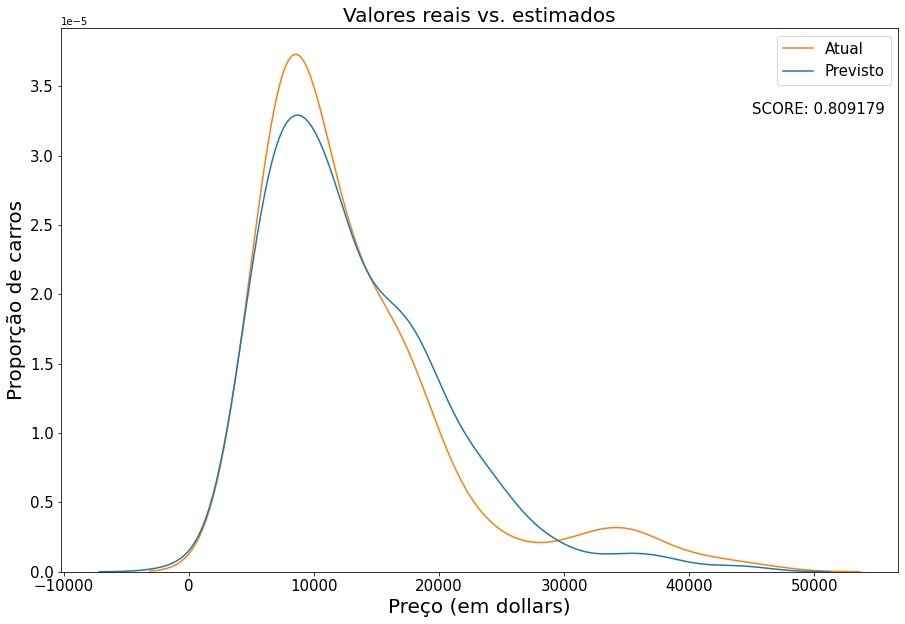

In [645]:
# Vamos colocar tudo num mesmo Data Frame para facilitar o Plot
%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_linear_multipla[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

plt.show()
plt.close()

# incluir linha na Tabela final para compararmos os diversos modelos
table.loc[table.shape[0]] = "Modelo 2",R2

In [646]:
# Verificando se melhorou a aderência dos resíduos a normalidade

shapiro_test = shapiro_francia(df_linear_multipla['Deviation'])

print("Se o valor for menor que 0.05 será rejeitado, Valor: {:.6f}".format(shapiro_test['p-value']))


method  :  Shapiro-Francia normality test
statistics W  :  0.9591597844810777
statistics z  :  3.9273155542833256
p-value  :  4.294962473533718e-05
Se o valor for menor que 0.05 será rejeitado, Valor: 0.000043


In [647]:
modelAnova = sm.OLS.from_formula('price ~ horsepower + curb_weight + engine_size', df_linear_multipla).fit()
summary_table = modelAnova.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     278.5
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.40e-70
Time:                        01:03:15   Log-Likelihood:                -1923.3
No. Observations:                 201   AIC:                             3855.
Df Residuals:                     197   BIC:                             3868.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.378e+04   1360.613    -10.125      0.000   -1.65e+04   -1.11e+04
horsepower     49.3550     11.878      4.155      0.000      25.931      72.779
curb_weight     4.4000      0.923      4.765      0.000       2.579       6.221
engine_size    83.8283     13.190      6.356      0.000      57.817     109.839
==============================================================================
Omnibus:                       16.776   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.375
Skew:                           0.416   Prob(JB):                     1.54e-07
Kurtosis:                       4.747   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelo 3 - Regressão Linear Múltipla com Variáveis Categóricas

In [648]:
df_linear_multipla_categorica = df[[
                                    'price'
                                    ,'horsepower'
                                    ,'curb-weight'
                                    ,'engine-size'
                                    ,'make'
                                    ,'fuel-type'
                                    ,'aspiration'
                                    ,'num-of-doors'
                                    ,'body-style'
                                    ,'drive-wheels'
                                    ,'engine-location'
                                    ,'fuel-system'

                                    ]].copy(deep=True)

df_linear_multipla_categorica = df_linear_multipla_categorica.rename(columns={
                                                                    'engine-size':'engine_size'
                                                                    ,'curb-weight':'curb_weight'
                                                                    ,'fuel-type':'fuel_type'
                                                                    ,'num-of-doors':'num_of_doors'
                                                                    ,'body-style':'body_style'
                                                                    ,'drive-wheels':'drive_wheels' 
                                                                    ,'engine-location':'engine_location'
                                                                    ,'fuel-system':'fuel_system'})

df_linear_multipla_categorica.head(20)

,price,horsepower,curb_weight,engine_size,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,fuel_system
0,13495.0,111.0,2548,130,alfa-romero,gas,std,two,convertible,rwd,front,mpfi
1,16500.0,111.0,2548,130,alfa-romero,gas,std,two,convertible,rwd,front,mpfi
2,16500.0,154.0,2823,152,alfa-romero,gas,std,two,hatchback,rwd,front,mpfi
3,13950.0,102.0,2337,109,audi,gas,std,four,sedan,fwd,front,mpfi
4,17450.0,115.0,2824,136,audi,gas,std,four,sedan,4wd,front,mpfi
5,15250.0,110.0,2507,136,audi,gas,std,two,sedan,fwd,front,mpfi
6,17710.0,110.0,2844,136,audi,gas,std,four,sedan,fwd,front,mpfi
7,18920.0,110.0,2954,136,audi,gas,std,four,wagon,fwd,front,mpfi
8,23875.0,140.0,3086,131,audi,gas,turbo,four,sedan,fwd,front,mpfi
9,16430.0,101.0,2395,108,bmw,gas,std,two,sedan,rwd,front,mpfi


In [649]:
VariaveisExplicativas = list(['make','aspiration','fuel_type','num_of_doors','body_style','drive_wheels','engine_location','fuel_system'])
df_linear_multipla_categorica_dummies = pd.get_dummies(df_linear_multipla_categorica,columns=VariaveisExplicativas)
df_linear_multipla_categorica_dummies.tail(20)

,price,horsepower,curb_weight,engine_size,make_BMW,make_VW,make_alfa-romero,make_audi,make_bmw,make_chevrolet,...,engine_location_front,engine_location_rear,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
181,8195.0,85.0,2212,109,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
182,8495.0,85.0,2275,109,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
183,9495.0,68.0,2319,97,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
184,9995.0,100.0,2300,109,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
185,11595.0,90.0,2254,109,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
186,9980.0,90.0,2221,109,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
187,13295.0,110.0,2661,136,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
188,13845.0,68.0,2579,97,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
189,12290.0,88.0,2563,109,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
190,12940.0,114.0,2912,141,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [650]:
# Criando as dummies
Y = df_linear_multipla_categorica_dummies['price']
X = df_linear_multipla_categorica_dummies.drop(columns=['price'])

In [651]:
#Calculando modelo
lm.fit(X, Y)
YHatLinMultCat=lm.predict(X)
R2 = lm.score(X, Y)
print("SCORE: ",R2)

SCORE:  0.9499964503820586


### Comparando Previsto x Real

Vamos usar o recurso gráfico para visualizar esse erro.

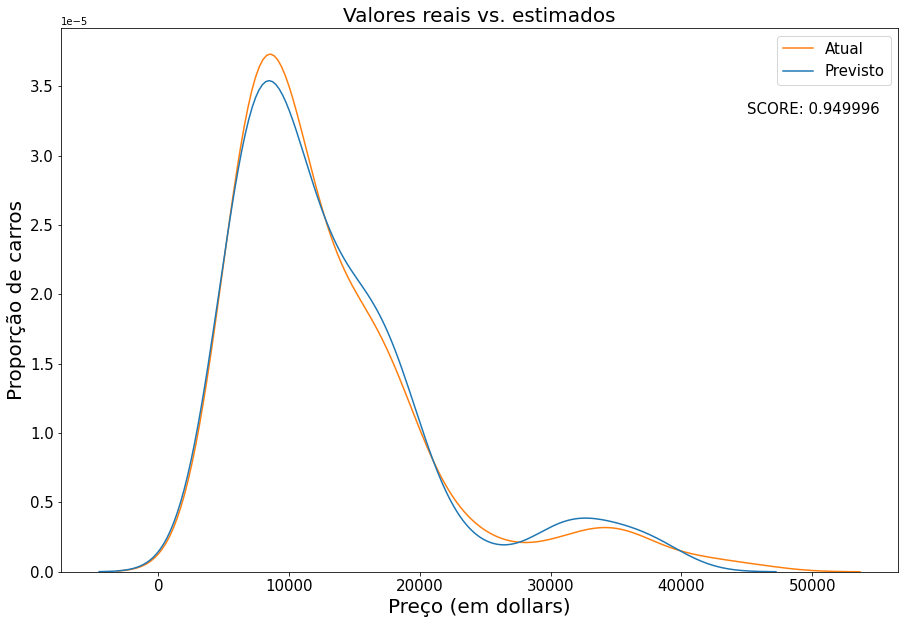

In [652]:
# Vamos colocar tudo num mesmo Data Frame para facilitar o Plot
df_linear_multipla_categorica_dummies_plot = df_linear_multipla_categorica_dummies.copy(deep=True)
df_linear_multipla_categorica_dummies_plot.loc[:,'YHat'] = YHatLinMultCat

%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_linear_multipla_categorica_dummies_plot[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %f" % R2

plt.text(45000, 0.000033, tt, size = 15)

plt.show()
plt.close()

# incluir linha na Tabela final para compararmos os diversos modelos
table.loc[table.shape[0]] = ["Modelo 3", R2]                                                  

### Cálculo dos erros:

* Absoluto médio
* Raiz do erro quadrático médio

Text(0.5, 0, 'Resíduo (em dollars)')

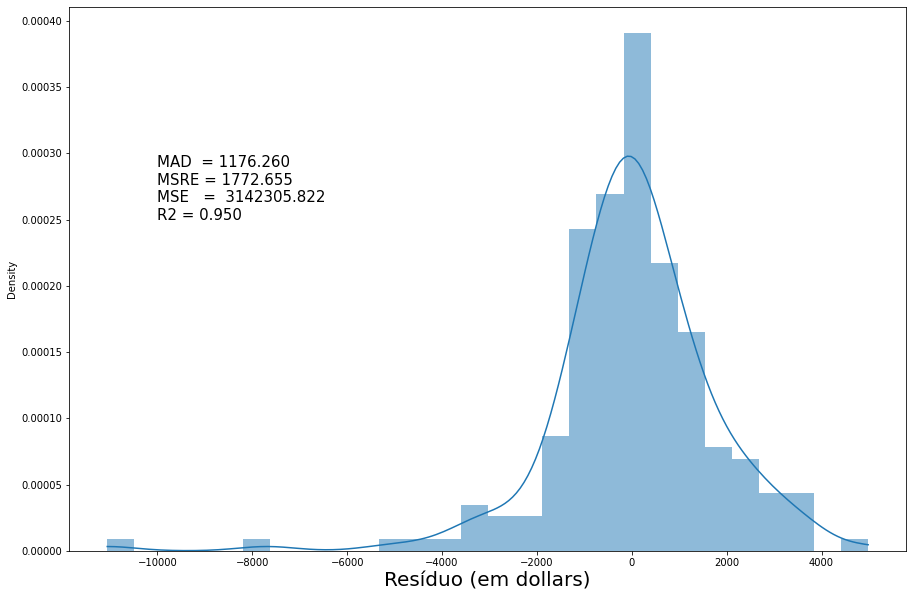

In [653]:

# Erro
df_linear_multipla_categorica_dummies_plot.loc[:,'Deviation'] = df_linear_multipla_categorica_dummies_plot['YHat']-Y

# Erro absoluto
df_linear_multipla_categorica_dummies_plot.loc[:,'AbsDeviation'] = abs(df_linear_multipla_categorica_dummies_plot['YHat']-Y)

# Quadrado do erro absolulto
df_linear_multipla_categorica_dummies_plot.loc[:,'SquaredError'] = (Y-df_linear_multipla_categorica_dummies_plot['YHat'])**2

#Mean Absolute Desviation - Erro absoluto médio
MAD = df_linear_multipla_categorica_dummies_plot['AbsDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_linear_multipla_categorica_dummies_plot['SquaredError'].mean()

#Mean Squared Root Error = Raiz do erro quadrado médio
MSRE = math.sqrt(MSE)

%matplotlib inline 
plt.figure(figsize=(15, 10))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f \nR2 = %.3f"  % (MAD, MSRE, MSE,R2)

sns.histplot(x=df_linear_multipla_categorica_dummies_plot['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-10000, 0.00025, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

In [654]:
# Verificando se melhorou a aderência dos resíduos a normalidade

shapiro_test = shapiro_francia(df_linear_multipla_categorica_dummies_plot['Deviation'])

print("Se o valor for menor que 0.05 será rejeitado, Valor: {:.6f}".format(shapiro_test['p-value']))

method  :  Shapiro-Francia normality test
statistics W  :  0.8821953727706672
statistics z  :  6.118441674117823
p-value  :  4.724742808899273e-10
Se o valor for menor que 0.05 será rejeitado, Valor: 0.000000


In [655]:
colunas = list(df_linear_multipla_categorica_dummies.columns)
colunas = list(map(lambda x: x.replace('-', '_'), colunas))
df_linear_multipla_categorica_dummies.columns = colunas
df_linear_multipla_categorica_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   201 non-null    float64
 1   horsepower              201 non-null    float64
 2   curb_weight             201 non-null    int64  
 3   engine_size             201 non-null    int64  
 4   make_BMW                201 non-null    uint8  
 5   make_VW                 201 non-null    uint8  
 6   make_alfa_romero        201 non-null    uint8  
 7   make_audi               201 non-null    uint8  
 8   make_bmw                201 non-null    uint8  
 9   make_chevrolet          201 non-null    uint8  
 10  make_dodge              201 non-null    uint8  
 11  make_doge               201 non-null    uint8  
 12  make_honda              201 non-null    uint8  
 13  make_isuzu              201 non-null    uint8  
 14  make_jaguar             201 non-null    ui

In [656]:
lista_colunas = list(df_linear_multipla_categorica_dummies.drop(columns='price',axis=1).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "price ~ " + formula_dummies_modelo
formula_dummies_modelo


'price ~ horsepower + curb_weight + engine_size + make_BMW + make_VW + make_alfa_romero + make_audi + make_bmw + make_chevrolet + make_dodge + make_doge + make_honda + make_isuzu + make_jaguar + make_mazda + make_mercedes_benz + make_mercury + make_mitsubishi + make_nissan + make_peugot + make_plymouth + make_porsche + make_renault + make_saab + make_subaru + make_toyota + make_volkswagen + make_volv1 + make_volvo + aspiration_std + aspiration_turbo + fuel_type_diesel + fuel_type_gas + num_of_doors_four + num_of_doors_two + body_style_convertible + body_style_hardtop + body_style_hatchback + body_style_sedan + body_style_wagon + drive_wheels_4wd + drive_wheels_fwd + drive_wheels_rwd + engine_location_front + engine_location_rear + fuel_system_1bbl + fuel_system_2bbl + fuel_system_4bbl + fuel_system_idi + fuel_system_mfi + fuel_system_mpfi + fuel_system_spdi + fuel_system_spfi'

In [657]:
modelAnova = sm.OLS.from_formula(formula_dummies_modelo,
                                          df_linear_multipla_categorica_dummies).fit()

#Parâmetros do modelo
modelAnova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     67.36
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.85e-81
Time:                        01:05:16   Log-Likelihood:                -1788.7
No. Observations:                 201   AIC:                             3667.
Df Residuals:                     156   BIC:                             3816.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -87.0183    661.793     -0.131      0.896   -1394.250    1220.213
horsepower                28.6366     17.146      1.670      0.097      -5.232      62.505
curb_weight                3.7268      1.233      3.024      0.003       1.292       6.162
engine_size               50.6145     14.258      3.550      0.001      22.451      78.778
make_BMW                1.262e+04   2043.841      6.177      0.000    8586.788    1.67e+04
make_VW                  911.0324   2052.160      0.444      0.658   -3142.574    4964.638
make_alfa_romero       -1652.1695   1357.723     -1.217      0.225   -4334.064    1029.725
make_audi               2891.6963    970.141      2.981      0.003     975.388    4808.004
make_bmw                6743.6848    875.754      7.700      0.000    5013.820    8473.550
make_chevrolet         -1238.9603   1251.493     -0.990      0.324   -3711.018    1233.098
make_dodge             -2740.8252    860.019     -3.187      0.002   -4439.611   -1042.040
make_doge              -1335.2077   1996.913     -0.669      0.505   -5279.685    2609.270
make_honda              -449.3295   1478.620     -0.304      0.762   -3370.028    2471.369
make_isuzu             -5395.8920   2092.231     -2.579      0.011   -9528.651   -1263.133
make_jaguar             4212.9799   1553.405      2.712      0.007    1144.557    7281.402
make_mazda             -1048.0168    630.469     -1.662      0.098   -2293.374     197.340
make_mercedes_benz      8382.4966   1170.243      7.163      0.000    6070.930    1.07e+04
make_mercury           -2495.1498   2064.671     -1.208      0.229   -6573.468    1583.169
make_mitsubishi        -3300.1983    858.570     -3.844      0.000   -4996.121   -1604.276
make_nissan            -2702.6774    591.907     -4.566      0.000   -3871.864   -1533.490
make_peugot            -1757.6081    987.423     -1.780      0.077   -3708.053     192.836
make_plymouth          -2985.0456    882.939     -3.381      0.001   -4729.105   -1240.986
make_porsche            4811.2698   1988.140      2.420      0.017     884.121    8738.419
make_renault           -3594.4992   1486.971     -2.417      0.017   -6531.695    -657.303
make_saab                257.3643   1045.025      0.246      0.806   -1806.860    2321.589
make_subaru            -2784.2012    751.611     -3.704      0.000   -4268.850   -1299.553
make_toyota            -2873.9962    463.777     -6.197      0.000   -3790.089   -1957.903
make_volkswagen        -1585.6870    794.279     -1.996      0.048   -3154.616     -16.758
make_volv1             -3716.9476   2018.377     -1.842      0.067   -7703.822     269.927
make_volvo               734.9078    823.283      0.893      0.373    -891.312    2361.128
aspiration_std          -513.4418    439.353     -1.169      0.244   -1381.291  

In [658]:
from statstests.process import stepwise

In [659]:
modelAnovaStep = stepwise(modelAnova, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 price ~ Q('horsepower') + Q('curb_weight') + Q('engine_size') + Q('make_BMW') + Q('make_VW') + Q('make_alfa_romero') + Q('make_audi') + Q('make_bmw') + Q('make_chevrolet') + Q('make_dodge') + Q('make_doge') + Q('make_honda') + Q('make_isuzu') + Q('make_jaguar') + Q('make_mazda') + Q('make_mercedes_benz') + Q('make_mercury') + Q('make_mitsubishi') + Q('make_nissan') + Q('make_peugot') + Q('make_plymouth') + Q('make_porsche') + Q('make_renault') + Q('make_saab') + Q('make_subaru') + Q('make_toyota') + Q('make_volkswagen') + Q('make_volv1') + Q('make_volvo') + Q('aspiration_std') + Q('aspiration_turbo') + Q('fuel_type_diesel') + Q('fuel_type_gas') + Q('num_of_doors_four') + Q('num_of_doors_two') + Q('body_style_convertible') + Q('body_style_hardtop') + Q('body_style_hatchback') + Q('body_style_sedan') + Q('body_style_wagon') + Q('drive_wheels_4wd') + Q('drive_wheels_fwd') + Q('drive_wheels_rwd') + Q('engine_location_front') + Q('engine_locatio

In [660]:
modelAnovaStep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     156.9
Date:                Fri, 31 Mar 2023   Prob (F-statistic):          1.55e-100
Time:                        01:09:00   Log-Likelihood:                -1808.0
No. Observations:                 201   AIC:                             3654.
Df Residuals:                     182   BIC:                             3717.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      29.4702   2585.199      0.011      0.991   -5071.346    5130.286
Q('horsepower')                41.5167      8.422      4.930      0.000      24.900      58.133
Q('curb_weight')                5.3020      0.689      7.696      0.000       3.943       6.661
Q('engine_size')               24.7193     10.115      2.444      0.015       4.762      44.677
Q('make_BMW')                 1.37e+04   2128.037      6.436      0.000    9497.095    1.79e+04
Q('make_audi')               3563.3128    872.737      4.083      0.000    1841.329    5285.297
Q('make_bmw')                8121.5054    855.063      9.498      0.000    6434.394    9808.617
Q('make_dodge')             -1595.4937    781.006     -2.043      0.043   -3136.483     -54.504
Q('make_jaguar')             5933.8905   1539.905      3.853      0.000    2895.529    8972.252
Q('make_mercedes_benz')      1.039e+04   1038.300     10.007      0.000    8342.098    1.24e+04
Q('make_mitsubishi')        -2512.8439    628.121     -4.001      0.000   -3752.179   -1273.509
Q('make_nissan')            -1416.0465    571.026     -2.480      0.014   -2542.730    -289.363
Q('make_plymouth')          -1752.2145    822.102     -2.131      0.034   -3374.291    -130.138
Q('make_porsche')            5741.3034   2080.971      2.759      0.006    1635.373    9847.234
Q('make_subaru')            -1460.6234    654.617     -2.231      0.027   -2752.238    -169.009
Q('make_toyota')            -1643.2118    436.316     -3.766      0.000   -2504.101    -782.323
Q('body_style_convertible')  2033.0723    885.952      2.295      0.023     285.014    3781.130
Q('body_style_wagon')       -1154.9036    497.443     -2.322      0.021   -2136.401    -173.406
Q('engine_location_front')  -8151.1870   2440.040     -3.341      0.001    -1.3e+04   -3336.782
==============================================================================
Omnibus:                       72.207   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.143
Skew:                           1.327   Prob(JB):                     1.51e-71
Kurtosis:                       8.648   Cond. No.                     7.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [671]:
df_step = pd.DataFrame({'price':df_linear_multipla_categorica_dummies_plot['price'],'YHat': modelAnovaStep.fittedvalues,'Deviation':modelAnovaStep.resid })
df_step.head(20)

,price,YHat,Deviation
0,13495.0,15242.671602,-1.747672e+03
1,16500.0,15242.671602,1.257328e+03
2,16500.0,16996.689226,-4.966892e+02
3,13950.0,14761.437685,-8.114377e+02
4,17450.0,18550.641417,-1.100641e+03
5,15250.0,16662.330237,-1.412330e+03
6,17710.0,18449.097255,-7.390973e+02
7,18920.0,17877.411358,1.042589e+03
8,23875.0,20854.082048,3.020918e+03
9,16430.0,19560.908968,-3.130909e+03


In [670]:
df_step.tail(20)

,price,YHat,Deviation
181,8195.0,9829.592707,-1634.592707
182,8495.0,10163.617402,-1668.617402
183,9495.0,9394.487714,100.512286
184,9995.0,10918.918128,-923.918128
185,11595.0,12292.931892,-697.931892
186,9980.0,10084.894269,-104.894269
187,13295.0,13915.522222,-620.522222
188,13845.0,10773.002327,3071.997673
189,12290.0,10660.234067,1629.765933
190,12940.0,15535.982701,-2595.982701


In [672]:
df_step.describe()

,price,YHat,Deviation
count,201.000000,201.000000,2.010000e+02
mean,13207.129353,13207.129353,-7.906631e-10
std,7947.066342,7702.715424,1.955515e+03
min,5118.000000,3268.311835,-4.983690e+03
25%,7775.000000,7471.799197,-1.064575e+03
50%,10295.000000,10744.145478,-1.842537e+01
75%,16500.000000,16530.141253,9.890937e+02
max,45400.000000,38199.390389,1.067213e+04


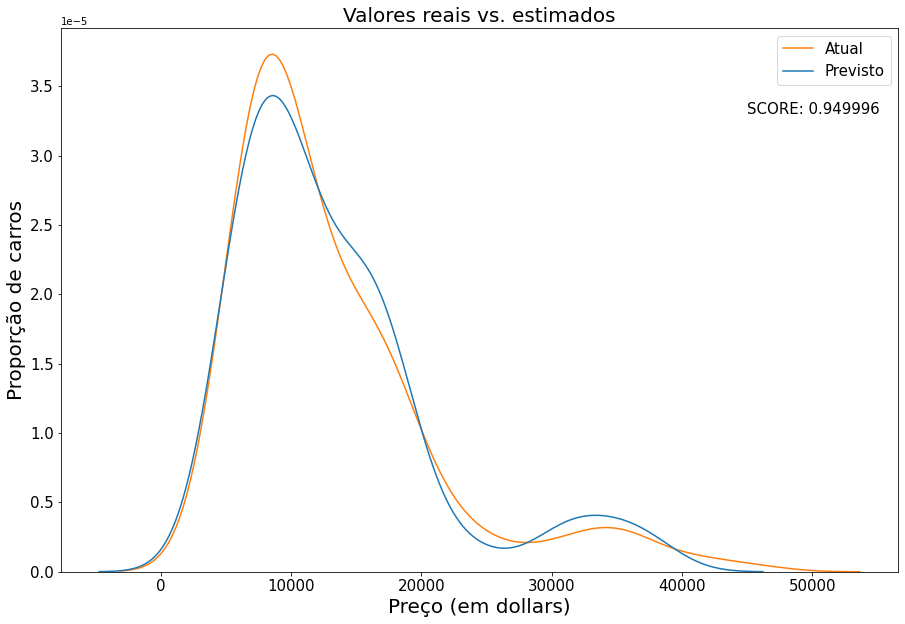

In [669]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_step[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %f" % R2

plt.text(45000, 0.000033, tt, size = 15)

plt.show()
plt.close()

# incluir linha na Tabela final para compararmos os diversos modelos
table.loc[table.shape[0]] = ["Modelo 3", R2]    

Text(0.5, 0, 'Resíduo (em dollars)')

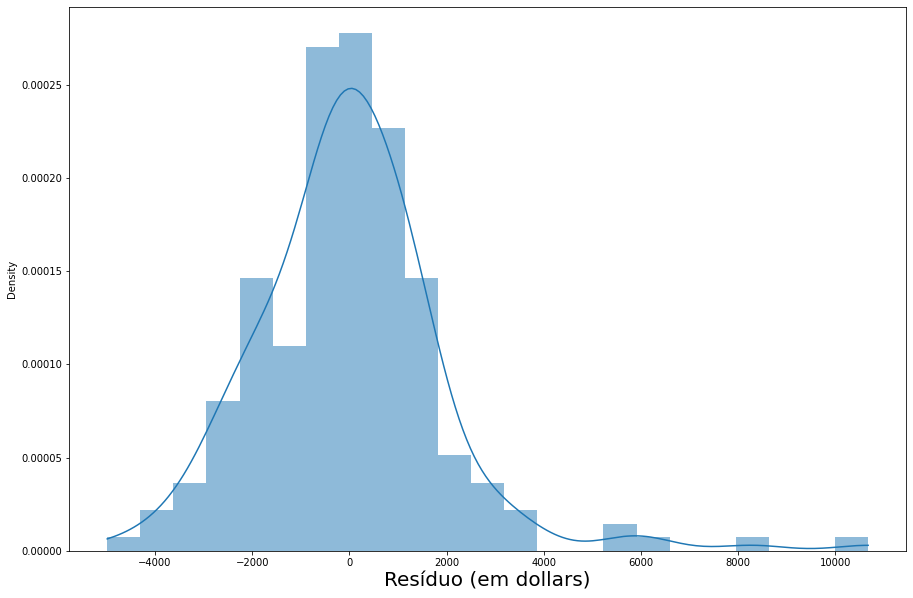

In [663]:
%matplotlib inline 
plt.figure(figsize=(15, 10))
sns.histplot(x=modelAnovaStep.resid, kde=True, stat="density", linewidth=0)
plt.xlabel('Resíduo (em dollars)', size = 20)

In [661]:
# Verificando se melhorou a aderência dos resíduos a normalidade
shapiro_test = shapiro_francia(modelAnovaStep.resid)

print("Se o valor for menor que 0.05 será rejeitado, Valor: {:.6f}".format(shapiro_test['p-value']))

method  :  Shapiro-Francia normality test
statistics W  :  0.9073434467281759
statistics z  :  5.6217735850238215
p-value  :  9.450343917256497e-09
Se o valor for menor que 0.05 será rejeitado, Valor: 0.000000


## Qual modelo é o melhor ?

In [673]:
table

,Modelo,Score
0,Modelo 1,0.496591
1,Modelo 2,0.809413
2,Modelo 2,0.809179
3,Modelo 3,0.949996
4,Modelo 3,0.949996


## Então quanto eu devo pedir pelo FUSCÃO ?

In [675]:
# Características do FUSCAO

#dados_fuscao = "https://raw.githubusercontent.com/EduPek/PPGOLD7037/main/Data/Auto_pronto_fuscao.csv"
dados_fuscao  = "../Data/MeuFuscao.csv"
df_fuscao = pd.read_csv(dados_fuscao)
df_fuscao




,horsepower,curb_weight,engine_size,make_BMW,make_audi,make_bmw,make_dodge,make_jaguar,make_mercedes_benz,make_mitsubishi,make_nissan,make_plymouth,make_porsche,make_toyota,body_style_convertible,body_style_wagon,engine_location_front
0,53,1850,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [681]:
df_linear_multipla_categorica_dummies.head(20)

,price,horsepower,curb_weight,engine_size,make_BMW,make_VW,make_alfa_romero,make_audi,make_bmw,make_chevrolet,...,engine_location_front,engine_location_rear,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,13495.0,111.0,2548,130,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,16500.0,111.0,2548,130,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,16500.0,154.0,2823,152,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,13950.0,102.0,2337,109,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,17450.0,115.0,2824,136,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5,15250.0,110.0,2507,136,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
6,17710.0,110.0,2844,136,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
7,18920.0,110.0,2954,136,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
8,23875.0,140.0,3086,131,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
9,16430.0,101.0,2395,108,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [691]:
lista_colunas = ['price','horsepower','curb_weight','engine_size','make_BMW','make_audi','make_bmw','make_dodge','make_jaguar','make_mercedes_benz','make_mitsubishi','make_nissan','make_plymouth','make_porsche','make_toyota','body_style_convertible','body_style_wagon','engine_location_front']
lista_colunas

['price',
 'horsepower',
 'curb_weight',
 'engine_size',
 'make_BMW',
 'make_audi',
 'make_bmw',
 'make_dodge',
 'make_jaguar',
 'make_mercedes_benz',
 'make_mitsubishi',
 'make_nissan',
 'make_plymouth',
 'make_porsche',
 'make_toyota',
 'body_style_convertible',
 'body_style_wagon',
 'engine_location_front']

In [692]:

df_melhor_modelo = df_linear_multipla_categorica_dummies.loc[:,lista_colunas]
df_melhor_modelo

,price,horsepower,curb_weight,engine_size,make_BMW,make_audi,make_bmw,make_dodge,make_jaguar,make_mercedes_benz,make_mitsubishi,make_nissan,make_plymouth,make_porsche,make_toyota,body_style_convertible,body_style_wagon,engine_location_front
0,13495.0,111.0,2548,130,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,16500.0,111.0,2548,130,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,16500.0,154.0,2823,152,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,13950.0,102.0,2337,109,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,17450.0,115.0,2824,136,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,16845.0,114.0,2952,141,0,0,0,0,0,0,0,0,0,0,0,0,0,1
197,19045.0,160.0,3049,141,0,0,0,0,0,0,0,0,0,0,0,0,0,1
198,21485.0,134.0,3012,173,0,0,0,0,0,0,0,0,0,0,0,0,0,1
199,22470.0,106.0,3217,145,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [693]:
X = df_melhor_modelo.drop(columns='price')
Y = df_melhor_modelo['price']
lm.fit(X,Y)
YhatFuscao = lm.predict(df_fuscao)

str = "O Preço de venda estimado do FUSCÃO é de %.2f Dólares" % YhatFuscao[0]
print(str)


O Preço de venda estimado do FUSCÃO é de 15013.24 Dólares


## Referências:

Translated and inspired in the material developed by IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>


## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-08-06  | 0.90  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Initial development |
| 2020-10-20  | 0.91  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Updated Graphs |
| 2021-04-11  | 1.00  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Updated Graphs, GitHub |

<hr>